# 팀 프로젝트 : 코로나 시국 이전의 서울 시민 따릉이 이용 추이

## 01) 사전 준비 ( 사용할 라이브러리 import, 오프라인 )

In [1]:
# 그래프 그리는 도구 2 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

In [2]:
import pandas as pd

# 그래프 그리는 도구 1 : sns.**plot(x='x축컬럼', y='y축컬럼', data=데이터프레임 형태로)
import seaborn as sns
# 단, 한글 표기시 깨지는 문제가 있어서 추가 작업이 필요함.( 한글 폰트 설정에 관한 코드라인 )

In [3]:
# 한글 깨짐 현상에 관한 추가 설정
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
# 그래프 그리는 도구 3 : 한글 표기가 용이한 대신, 다양한 형태의 그래프를 그리는데 제약이 따름 (ex. 꺽은 선그래프에 평균값, 중앙값, 최대최소 범위 등을 면적으로 나타내는 기능이 없음.)
import plotly
import cufflinks as cf

In [5]:
import pandas as pd
import numpy as np  
%matplotlib inline  
from plotly import __version__ 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

## 02) 데이터 셋 불러오기 (2018년 자료, csv파일 내에서 대여일자만 수정하고, 그 외 모든 데이터 유지)
출처 : [서울시 공공데이터](http://data.seoul.go.kr/dataList/OA-15248/F/1/datasetView.do#)

In [6]:
bike19 = pd.read_csv('./data_set/서울특별시 공공자전거 이용정보(2019년 전월).csv')
bike19.head()

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,2019_01,3,중랑센터,일일(회원),M,AGE_003,12,288.87,2.25,9690,117
1,2019_01,3,중랑센터,일일(회원),M,AGE_004,8,424.63,3.32,14310,151
2,2019_01,3,중랑센터,일일(회원),M,AGE_005,27,4579.48,41.29,177910,542
3,2019_01,3,중랑센터,정기,M,AGE_003,17,3438.8,33.58,144730,593
4,2019_01,5,상암센터 정비실,일일(회원),M,AGE_004,1,78.31,0.72,3090,33


## 03) 데이터 셋 전처리 (1. 결측치값 채우기: fillna 이용, 2. 같은 의미 데이터 같은 표시로 통일: 소문자 -> 대문자로, \\N -> Unknown으로)

In [7]:
# 각 컬럼별 결측치 존재여부 및 개수 확인 : 성별 컬럼에만 결측치가 있네
bike19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675209 entries, 0 to 675208
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   대여일자     675209 non-null  object
 1   대여소번호    675209 non-null  int64 
 2   대여소      675209 non-null  object
 3   대여구분코드   675209 non-null  object
 4   성별       582091 non-null  object
 5   연령대코드    675209 non-null  object
 6   이용건수     675209 non-null  int64 
 7   운동량      675209 non-null  object
 8   탄소량      675209 non-null  object
 9   이동거리(M)  675209 non-null  int64 
 10  이동시간(분)  675209 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 56.7+ MB


In [8]:
# 성별 컬럼에 93118개의 값이 비어있네
bike19['성별'].isnull().sum()

93118

In [9]:
# 그럼 성별컬럼에는 어떤 데이터들이 있는거지? 어떻게 통일 시켜줘야하지?
bike19['성별'].unique()

array(['M', ' ', 'F', nan, 'f', 'm', '\\N'], dtype=object)

In [10]:
# 결측치 처리 : fillna을 통해 공란은 U로 채우자.
bike19['성별'] = bike19['성별'].fillna('U')
bike19['성별'].unique()

array(['M', ' ', 'F', 'U', 'f', 'm', '\\N'], dtype=object)

In [11]:

# 같은의미 다른표기 통일 : reaplace 사용
bike19['성별'] = bike19['성별'].str.replace(pat=r'\\N', repl=r'U', regex=True)
bike19['성별'].unique()

array(['M', ' ', 'F', 'U', 'f', 'm'], dtype=object)

In [12]:
bike19['성별'] = bike19['성별'].str.replace(pat=r' ', repl=r'U', regex=True)
bike19['성별'].unique()

array(['M', 'U', 'F', 'f', 'm'], dtype=object)

In [13]:
# 같은의미 다른표기 통일 : map사용 (주의 : 정의하지 않은 데이터에 대해선 모두 nan(NULL)처리 해버림)
bike19['성별'] = bike19['성별'].map({'m':'M','M':'M',   'f':'F','F':"F",   'U':'Unknown'})
bike19['성별'].unique()

array(['M', 'Unknown', 'F'], dtype=object)

In [14]:
bike19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675209 entries, 0 to 675208
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   대여일자     675209 non-null  object
 1   대여소번호    675209 non-null  int64 
 2   대여소      675209 non-null  object
 3   대여구분코드   675209 non-null  object
 4   성별       675209 non-null  object
 5   연령대코드    675209 non-null  object
 6   이용건수     675209 non-null  int64 
 7   운동량      675209 non-null  object
 8   탄소량      675209 non-null  object
 9   이동거리(M)  675209 non-null  int64 
 10  이동시간(분)  675209 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 56.7+ MB


## 04) 월별 따릉이 총 이용건수

1.   sns.**plot 사용
2.   matplot사용
3.   iplot 사용




(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2019_01'),
  Text(1, 0, '2019_02'),
  Text(2, 0, '2019_03'),
  Text(3, 0, '2019_04'),
  Text(4, 0, '2019_05'),
  Text(5, 0, '2019_06'),
  Text(6, 0, '2019_07'),
  Text(7, 0, '2019_08'),
  Text(8, 0, '2019_09'),
  Text(9, 0, '2019_10'),
  Text(10, 0, '2019_11'),
  Text(11, 0, '2019_12')])

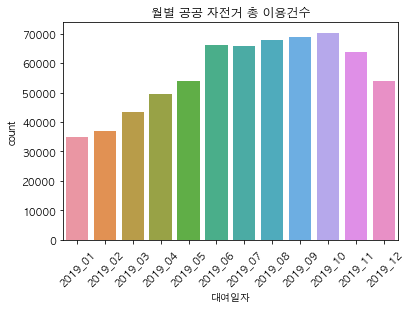

In [15]:
sns.countplot(x='대여일자', data=bike19).set_title('월별 공공 자전거 총 이용건수')
plt.xticks(rotation=45)

In [ ]:
# matplot 에는 countplot기능이 지원되지 않음!!
# 따라서 2단계 데이터 준비단계 때, 총 이용 건수를 미리 계산해놔야한다.
# 참고 사이트 : https://colab.research.google.com/drive/1svcnbAtO2HwtFPmkKbg9hxrvChVzTAjn#scrollTo=r8Ughx7GXZTU&line=3&uniqifier=1

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = bike19['대여일자']
y = bike19['이용건수'].sum() #y = bike19['이용건수'].sum()


# 3 그래프 그리기
plt.plot(x, y, 'bo') # 'bo' = blue, circle 
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()


In [16]:
# groupby(['']).sum() 을 통해 데이터 프레임 형태의 '소계 데이터 셋'을 생성하고, 새롭게 생성된 데이터 셋으로 그래프를 그려야함.
bike19_sum = bike19[['대여일자','이용건수','이동거리(M)','이동시간(분)']].groupby(['대여일자']).sum()

# 컬럼명 변경 : rename 이용하기  (대여일자 컬럼을 가져올수 없는 오류)
# bike19_sum.rename(columns={'이용건수'    :'총 이용건수'},inplace = True)
# bike19_sum.rename(columns={'이동거리(M)' :'총 이동거리'},inplace = True)
# bike19_sum.rename(columns={'이동시간(분)':'총 이용시간'},inplace = True)

# 컬럼명 변경 : dataframe 새로 정의하기
bike19_sum = pd.DataFrame({'대여일자'    : bike19_sum.index, 
                           '총 이용건수' : bike19_sum['이용건수'], 
                           '총 이동거리' : bike19_sum['이동거리(M)'],
                           '총 이용시간' : bike19_sum['이동시간(분)']})
bike19_sum = bike19_sum.reset_index(drop=True)
bike19_sum

#bike19_sum.iplot(kind='line',x='대여일자' ,y='총 이용건수',theme='space', title='월별 따릉이 총 이용건수')


,대여일자,총 이용건수,총 이동거리,총 이용시간
0,2019_01,495573,1739532860,9459171
1,2019_02,471536,1848382466,10290548
2,2019_03,904788,3736667090,20897989
3,2019_04,1468848,6719384374,39642036
4,2019_05,2151064,10807324110,61348820
5,2019_06,2293879,12206908080,61987844
6,2019_07,2164086,11355109980,54326375
7,2019_08,2101184,11128106970,56553326
8,2019_09,2084222,11662048710,58548585
9,2019_10,2436401,13386448420,64250207


In [17]:
bike19_sum.iplot(kind='line',x='대여일자' ,y='총 이용건수',theme='space', title='월별 따릉이 총 이용건수')

In [18]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


## 05) 월별 따릉이 총 이용시간

In [19]:
bike19_sum.iplot(kind='line',x='대여일자',y='총 이용시간',theme='space', title='월별 총 이용시간')

## 06) 월별 따릉이 총 이동거리

In [20]:
bike19_sum.iplot(kind='line',x='대여일자',y='총 이동거리',theme='space', title='월별 총 이동거리')

## 07) 월별 한사람 평균 이용건수

In [21]:
# 평균 데이터셋 새롭게 생성한다.
bike19_mean = bike19[['대여일자','이용건수','이동거리(M)','이동시간(분)']].groupby(['대여일자']).mean()
bike19_mean = pd.DataFrame({'대여일자' : bike19_mean.index, 
                           '평균 이용건수' : bike19_mean['이용건수'], 
                           '평균 이동거리' : bike19_mean['이동거리(M)'],
                           '평균 이용시간' : bike19_mean['이동시간(분)']})
bike19_mean = bike19_mean.reset_index(drop=True)
bike19_mean

,대여일자,평균 이용건수,평균 이동거리,평균 이용시간
0,2019_01,14.232833,49959.299808,271.666935
1,2019_02,12.756283,50003.583552,278.386257
2,2019_03,20.891937,86281.220329,482.543387
3,2019_04,29.725943,135984.141299,802.259244
4,2019_05,39.981116,200872.162931,1140.270250
5,2019_06,34.611005,184182.933188,935.298509
6,2019_07,32.837443,172300.350212,824.338422
7,2019_08,30.955758,163945.179811,833.173623
8,2019_09,30.287321,169469.573639,850.811378
9,2019_10,34.650790,190383.690356,913.774224


In [22]:
bike19_mean.iplot(kind='line',x='대여일자',y='평균 이용건수',theme='space', title='월별 한사람 평균 이용건수')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

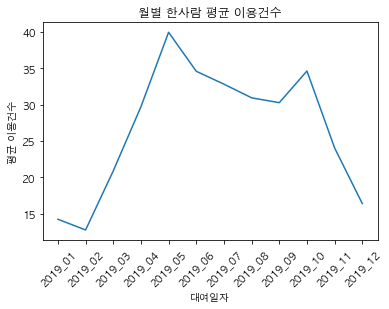

In [25]:
# 한글 깨짐 문제 해결 안됨
sns.lineplot(x='대여일자',y='평균 이용건수', data=bike19_mean).set_title('월별 한사람 평균 이용건수')
plt.xticks(rotation=45)

## 08) 월별 한사람 평균 이용시간

In [26]:
bike19_mean.iplot(kind='line',x='대여일자',y='평균 이용시간',theme='space', title='월별 한사람 평균 이용시간')

## 09) 월별 한사람 평균 이동거리

In [27]:
bike19_mean.iplot(kind='line',x='대여일자',y='평균 이동거리',theme='space', title='월별 한사람 평균 이동거리')

## 10) 월별 한 사람 평균 주행속력

In [31]:
bike19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675209 entries, 0 to 675208
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   대여일자     675209 non-null  object
 1   대여소번호    675209 non-null  int64 
 2   대여소      675209 non-null  object
 3   대여구분코드   675209 non-null  object
 4   성별       675209 non-null  object
 5   연령대코드    675209 non-null  object
 6   이용건수     675209 non-null  int64 
 7   운동량      675209 non-null  object
 8   탄소량      675209 non-null  object
 9   이동거리(M)  675209 non-null  int64 
 10  이동시간(분)  675209 non-null  int64 
 11  주행속력     675209 non-null  object
dtypes: int64(4), object(8)
memory usage: 61.8+ MB


In [29]:
bike19['이동거리(M)']

0           9690
1          14310
2         177910
3         144730
4           3090
           ...  
675204         0
675205       150
675206         0
675207      1740
675208    272930
Name: 이동거리(M), Length: 675209, dtype: int64

In [123]:
# 기존의 값을 계산하여 새로 만든 컬럼에 값 저장하기
bike19['주행속력'] = ( bike19['이동거리(M)'] / 1000 ) / ( bike19['이동시간(분)'] / 60 )
bike19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675209 entries, 0 to 675208
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     675209 non-null  object 
 1   대여소번호    675209 non-null  int64  
 2   대여소      675209 non-null  object 
 3   대여구분코드   675209 non-null  object 
 4   성별       675209 non-null  object 
 5   연령대코드    675209 non-null  object 
 6   이용건수     675209 non-null  int64  
 7   운동량      675209 non-null  object 
 8   탄소량      675209 non-null  object 
 9   이동거리(M)  675209 non-null  int64  
 10  이동시간(분)  675209 non-null  int64  
 11  주행속력     674908 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 61.8+ MB


In [124]:
# 결측치 및 이상치값 제거
bike19['주행속력'] = bike19['주행속력'].fillna(0)

bike19.info()
bike19['주행속력'].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675209 entries, 0 to 675208
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     675209 non-null  object 
 1   대여소번호    675209 non-null  int64  
 2   대여소      675209 non-null  object 
 3   대여구분코드   675209 non-null  object 
 4   성별       675209 non-null  object 
 5   연령대코드    675209 non-null  object 
 6   이용건수     675209 non-null  int64  
 7   운동량      675209 non-null  object 
 8   탄소량      675209 non-null  object 
 9   이동거리(M)  675209 non-null  int64  
 10  이동시간(분)  675209 non-null  int64  
 11  주행속력     675209 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 61.8+ MB


0

In [125]:
# 근데 이상하다. 소계가 무한대값이 나오는 부분이 어딘지 확인해보고, 개별값이 어떻게 나오는지 한번 확인해보자.
bike19.loc[143835:143835,['주행속력']].mean()

주행속력    inf
dtype: float64

In [165]:
# 155000 번째 열 과 155030 번째 열 사이에서 평균값을 구하니 inf 무한대가 나온다. 여기 개별값이 어떻게 되는지 확인해보자
bike19.loc[143835:143835]

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분),주행속력
143835,2019_04,1360,1360. 정릉역,정기,F,AGE_007,1,1.9,0.02,80,0,inf


In [166]:
# https://doubly12f.tistory.com/45
# 주행속력 컬럼의 값이 inf인 데이터는 0 으로 바꿔준다.
bike19['주행속력'] = bike19['주행속력'].replace([np.inf, -np.inf], np.nan)

In [168]:
# 평균 데이터셋 새롭게 생성한다.
bike19_mean = bike19[['대여일자','이용건수','이동거리(M)','이동시간(분)','주행속력']].groupby(['대여일자']).mean()
bike19_mean = pd.DataFrame({'대여일자' : bike19_mean.index, 
                           '평균 이용건수' : bike19_mean['이용건수'], 
                           '평균 이동거리' : bike19_mean['이동거리(M)'],
                           '평균 이용시간' : bike19_mean['이동시간(분)'],
                           '평균 주행속력' : bike19_mean['주행속력']})
bike19_mean = bike19_mean.reset_index(drop=True)
bike19_mean

,대여일자,평균 이용건수,평균 이동거리,평균 이용시간,평균 주행속력
0,2019_01,14.232833,49959.299808,271.666935,12.783913
1,2019_02,12.756283,50003.583552,278.386257,11.847869
2,2019_03,20.891937,86281.220329,482.543387,11.641916
3,2019_04,29.725943,135984.141299,802.259244,10.588453
4,2019_05,39.981116,200872.162931,1140.270250,11.369999
5,2019_06,34.611005,184182.933188,935.298509,12.436861
6,2019_07,32.837443,172300.350212,824.338422,13.145022
7,2019_08,30.955758,163945.179811,833.173623,12.950136
8,2019_09,30.287321,169469.573639,850.811378,13.043643
9,2019_10,34.650790,190383.690356,913.774224,13.685227


In [169]:
bike19_mean.iplot(kind='line',x='대여일자',y='평균 주행속력',theme='space', title='월별 한사람 평균 주행속력')

In [ ]:
sns.barplot(x='대여일자', y='주행속력', data=bike19)
plt.xticks(rotation=45)

## 11) 월별 따릉이 이용량을 연도별 비교